In [1]:
# import impartant libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the dataset is diabetes 
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


'Here, we used the heatmap beacause what i am saying is what are the feature in dataset and Also what is the range of the features.Here, We can see \n   the feature values in heatmap '

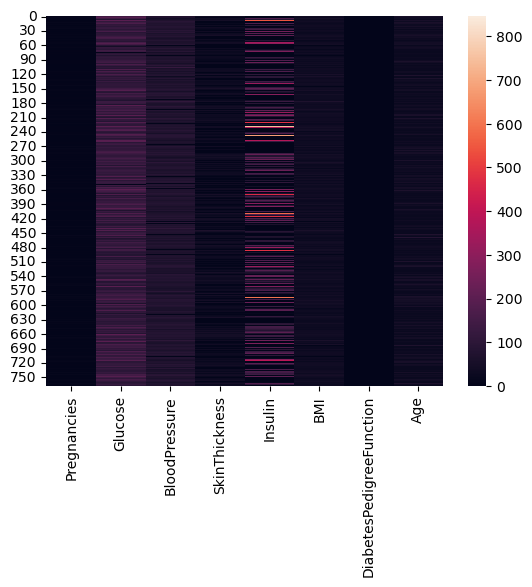

In [4]:
# EDA processing 
df1 = df.drop("Outcome" , axis = 1)
sns.heatmap(df1)
"""Here, we used the heatmap beacause what i am saying is what are the feature in dataset and Also what is the range of the features.Here, We can see 
   the feature values in heatmap """   

# Data preprocessing start at this point

In [5]:
# Check for the null values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

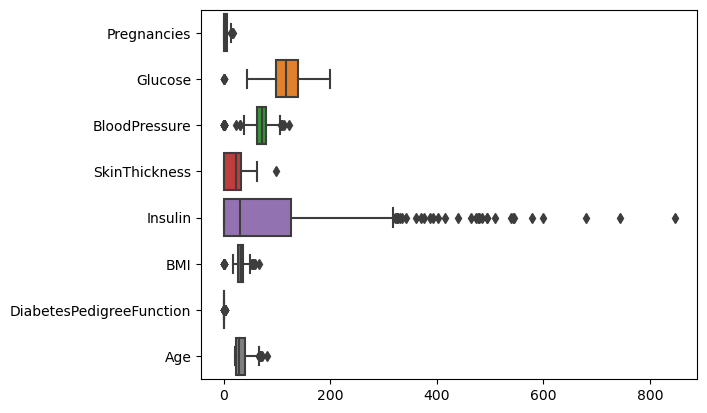

In [6]:
# Check for the outliers in the features
sns.boxplot(df1,orient="h")
#Here  we can see outliers in Insulin and BloodPressure 

In [7]:
# Acoording to the problem we will taking features are Glucose and Insulin Convert the dataset 
df1 = df[["Glucose","Insulin","Outcome"]]
df1.to_csv("dataset.csv")

In [8]:
df = pd.read_csv("dataset.csv")

In [9]:
df = df.drop("Unnamed: 0",axis =1)

In [10]:
df # Here we see the dataset clearly.we are strat the preprocessing steps

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
...,...,...,...
763,101,180,0
764,122,0,0
765,121,112,0
766,126,0,1


<Axes: >

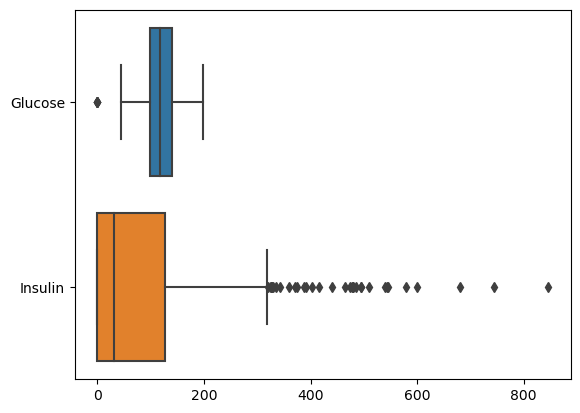

In [11]:
df1=df[["Glucose","Insulin"]]
sns.boxplot(df1,orient ="h") # there is no Outlier in glucose,however Insulin having a outliers 


In [12]:
import numpy as np
Q1 = np.percentile(df["Insulin"], 25)
Q3 = np.percentile(df["Insulin"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df["Insulin"] < lower_bound) | (df["Insulin"] > upper_bound)] = np.nan

In [13]:
print(df[df['Glucose']==0].shape[0])
print(df[df['Insulin']==0].shape[0])

5
374


In [14]:
#replacing 0 values with NULL of that column
df['Glucose']=df['Glucose'].replace(0,np.nan)
df['Insulin']=df['Insulin'].replace(0,np.nan)

<Axes: >

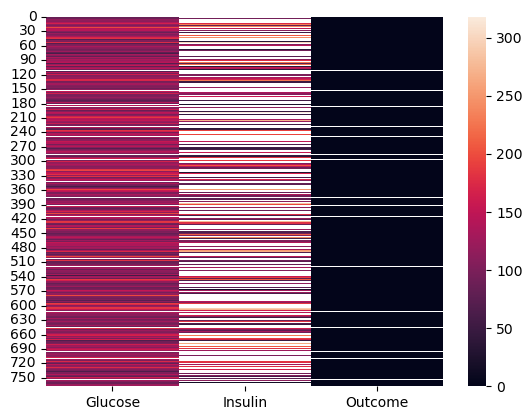

In [15]:
sns.heatmap(df)

In [16]:
#replacing 0 values with NULL of that column
df['Glucose']=df['Glucose'].replace(np.nan,df["Glucose"].mean())
df['Insulin']=df['Insulin'].replace(np.nan,df["Insulin"].median())
df['Outcome']=df['Outcome'].replace(np.nan,0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    float64
 1   Insulin  768 non-null    float64
 2   Outcome  768 non-null    float64
dtypes: float64(3)
memory usage: 18.1 KB


<Axes: >

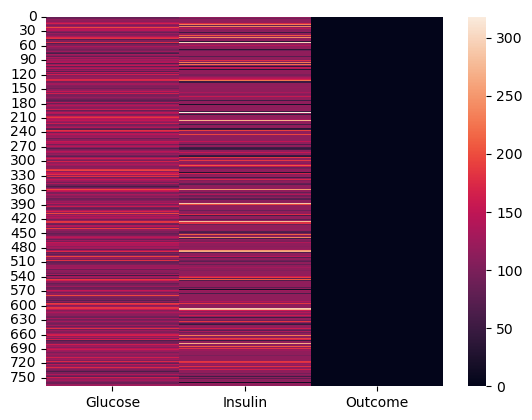

In [18]:
sns.heatmap(df)

In [19]:
df['Outcome']=df['Outcome'].astype(int)

In [20]:
df

,Glucose,Insulin,Outcome
0,148.0,115.0,1
1,85.0,115.0,0
2,183.0,115.0,1
3,89.0,94.0,0
4,137.0,168.0,1
...,...,...,...
763,101.0,180.0,0
764,122.0,115.0,0
765,121.0,112.0,0
766,126.0,115.0,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
X = df[["Glucose","Insulin"]]
Y = df['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
log_reg = LogisticRegression()
log_reg . fit(X_train , y_train)
logreg_predictions = log_reg . predict(X_test)
log_reg_train = log_reg.predict(X_train)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_train = knn.predict(X_train)

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_train = nb.predict(X_train)

In [27]:
from tkinter import *
from tkinter import messagebox


font1 = ("Times New Roman", 14)

# Create the main window
user_interface = Tk()
user_interface.geometry("500x500")
user_interface.title("Diabetes analysis")

# Define StringVar variables
v1 = StringVar()
v2 = StringVar()

def get_value():
    a = 0
    b = 0
    
    # Get input values and validate them
    e1 = E1.get()
    if e1 and e1.isdigit():
        a = float(e1)
    
    e2 = E2.get()
    if e2 and e2.isdigit():
        b = float(e2)
    
    # Update the StringVar variables
    v1.set(a)
    v2.set(b)

    # Calculate model predictions (replace with your actual model predictions)
    log_reg_train = 1.0  # Replace with your model's accuracy
    logreg_predictions = 1.0  # Replace with your model's accuracy
    knn_train = 0.9723127035830619  # Replace with your model's accuracy
    knn_predictions = 0.9805194805194806  # Replace with your model's accuracy
    nb_train = 0.9315960912052117  # Replace with your model's accuracy
    nb_predictions = 0.961038961038961 # Replace with your model's accuracy
    
    # Open a new window to display results
    newWindow = Toplevel(user_interface)
    newWindow.title("Prediction Result")
    newWindow.geometry("500x500")
    data = {'Glucose':[a],
            'Insulin':[b]}
    new_df = pd.DataFrame(data)
    pre = log_reg.predict(new_df)
    
    # predicted_probabilities = log_reg.predict_proba(new_df) * 100
    
    # Get probabilities for each class
    """ predicted_probability = log_reg.predict_proba(new_df)
    class_probabilities = predicted_probability[0] * 100
    pro1 = class_probabilities[0]
    pro2 = class_probabilities[1]
    pro3 = class_probabilities[2]
    print(pro1,pro2,pro3)"""


    glucose_normal_threshold = 100
    glucose_prediabetes_threshold = 120
    glucose_diabetes_threshold = 140


    insulin_normal_threshold = 20
    insulin_prediabetes_threshold = 30
    insulin_diabetes_threshold = 40

    
    if pre == 0 :
        prediction = "Normal"
        glucose_percentage_close_to_normal = ((glucose_normal_threshold - abs(new_df.loc[0,"Glucose"] - glucose_normal_threshold)) / glucose_normal_threshold) * 100
        insulin_percentage_close_to_normal = ((insulin_normal_threshold - abs(new_df.loc[0,"Insulin"] - insulin_normal_threshold)) / insulin_normal_threshold) * 100
        combined_percentage_normal = (glucose_percentage_close_to_normal + insulin_percentage_close_to_normal) / 2
        # print(combined_percentage_normal)
        prediction_label = Label(newWindow, text="The highest probability is "+str(combined_percentage_normal)+"%" ,font = font1)
        prediction_label.grid(row=15, column=1)
    elif pre == 1:
        prediction = "Prediabetes"
        glucose_percentage_close_to_prediabetes = ((glucose_prediabetes_threshold - abs(new_df.loc[0,"Glucose"]  - glucose_prediabetes_threshold)) / (glucose_prediabetes_threshold - glucose_normal_threshold)) * 100
        insulin_percentage_close_to_prediabetes = ((insulin_prediabetes_threshold - abs(new_df.loc[0,"Insulin"] - insulin_prediabetes_threshold)) / (insulin_prediabetes_threshold - insulin_normal_threshold)) * 100
        combined_percentage_prediabetes = (glucose_percentage_close_to_prediabetes + insulin_percentage_close_to_prediabetes) / 2
        prediction_label = Label(newWindow, text="The highest probability is " +str(combined_percentage_prediabetes)+"%",font = font1)
        prediction_label.grid(row=15, column=1)
    else:
        prediction = "Diabetes"
        glucose_percentage_close_to_diabetes = ((glucose_diabetes_threshold - abs(new_df.loc[0,"Glucose"]  - glucose_diabetes_threshold)) / (glucose_diabetes_threshold - glucose_prediabetes_threshold)) * 100
        insulin_percentage_close_to_diabetes = ((insulin_diabetes_threshold - abs(new_df.loc[0,"Insulin"]- insulin_diabetes_threshold)) / (insulin_diabetes_threshold - insulin_prediabetes_threshold)) * 100
        combined_percentage_diabetes = (glucose_percentage_close_to_diabetes + insulin_percentage_close_to_diabetes) / 2
        prediction_label = Label(newWindow, text="The highest probability is"+str(combined_percentage_diabetes)+"%",font = font1)
        prediction_label.grid(row=15, column=1)
        


    # Display the prediction result in the new window
    prediction_label = Label(newWindow, text="The accuracy of train LogisticRegression is: " + str(log_reg_train),font = font1)
    prediction_label.grid(row=1, column=1)
    prediction_label = Label(newWindow, text="The accuracy of Test LogisticRegression is: " + str(logreg_predictions),font = font1)
    prediction_label.grid(row=3, column=1)
    prediction_label = Label(newWindow, text="The accuracy of Train KNeighborsClassifier is: " + str(knn_train),font = font1)
    prediction_label.grid(row=5, column=1)
    prediction_label = Label(newWindow, text="The accuracy of test KNeighborsClassifier is: " + str(knn_predictions),font = font1)
    prediction_label.grid(row=7, column=1)
    prediction_label = Label(newWindow, text="The accuracy of train GaussianNB is: " + str(nb_train),font = font1)
    prediction_label.grid(row=9, column=1)
    prediction_label = Label(newWindow, text="The accuracy of test GaussianNB is: " + str(nb_predictions),font = font1)
    prediction_label.grid(row=11, column=1)
    prediction_label = Label(newWindow, text="Your Diabetes status is " +str(prediction),font = font1)
    prediction_label.grid(row=13, column=1)

    # Wait for the new window to close before continuing

# Create labels, entry fields, and a submit button
L1 = Label(user_interface, text="Enter the Glucose value:",font = font1)
L1.grid(row=1, column=1)
L2 = Label(user_interface, text="Enter the Insulin value:",font = font1)
L2.grid(row=2, column=1)
E1 = Entry(user_interface, bd=5, bg="Lavender")
E1.grid(row=1, column=2)
E2 = Entry(user_interface, bd=5, bg="Lavender")
E2.grid(row=2, column=2)
B1 = Button(user_interface, text="Submit", command=get_value,font = font1)
B1.grid(row=4, column=1)
 
user_interface.mainloop()
